# Framingham Heart Disease Dataset Overview

The dataset includes 4,240 records and 16 columns, with 15 attributes used for analysis. The goal is to predict whether a patient has a 10-year risk of future CHD (Coronary Heart Disease).

The dataset incorporates various health-related attributes, including gender, education, current smoker status, cigarettes per day, and other relevant features.

The target column is 'TenYearCHD', which is a binary classification indicating 1 if the patient is at risk of CHD within 10 years and 0 if not. The dataset is imbalanced, with a higher number of records indicating no disease.

In [1]:
#Essential imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn for preprocessing, feature selection, and model evaluation
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import (
    train_test_split, GridSearchCV, StratifiedShuffleSplit, 
    StratifiedKFold, RepeatedStratifiedKFold, RandomizedSearchCV, validation_curve
)
from sklearn.feature_selection import (
    SelectKBest, chi2, f_classif, mutual_info_classif, RFE, 
    SelectFromModel, RFECV
)
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    classification_report, confusion_matrix, roc_curve, 
    roc_auc_score, log_loss
)

# Model Imports
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# External Libraries for advanced modeling
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Imbalanced-learn for handling imbalanced datasets
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

# Clustering
from sklearn.cluster import KMeans


# Data Exploration & Handling imbalancing

In this section, we handle the transformation and management of missing values to ensure data quality and prepare it for modeling

Steps taken:
1. Renaming 'male' to 'gender' to increase clarity in the data
2. Missing values handled by imputation stratergies 
3. Handle imabalanced dataset using 

In [1]:
import os

In [2]:
current_directory = os.getcwd()
parent_directory = os.path.abspath(os.path.join(current_directory, '..'))
dataset_folder = os.path.join(parent_directory, 'data')

In [3]:
import pandas as pd
file_path = os.path.join(dataset_folder, 'Framingham.csv')
df = pd.read_csv(file_path)

In [4]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
#Renaming male column to gender to ensure calirty 
df.rename(columns={'male':'gender'},inplace=True)

In [6]:
df.isnull().sum() #Missing values data

gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

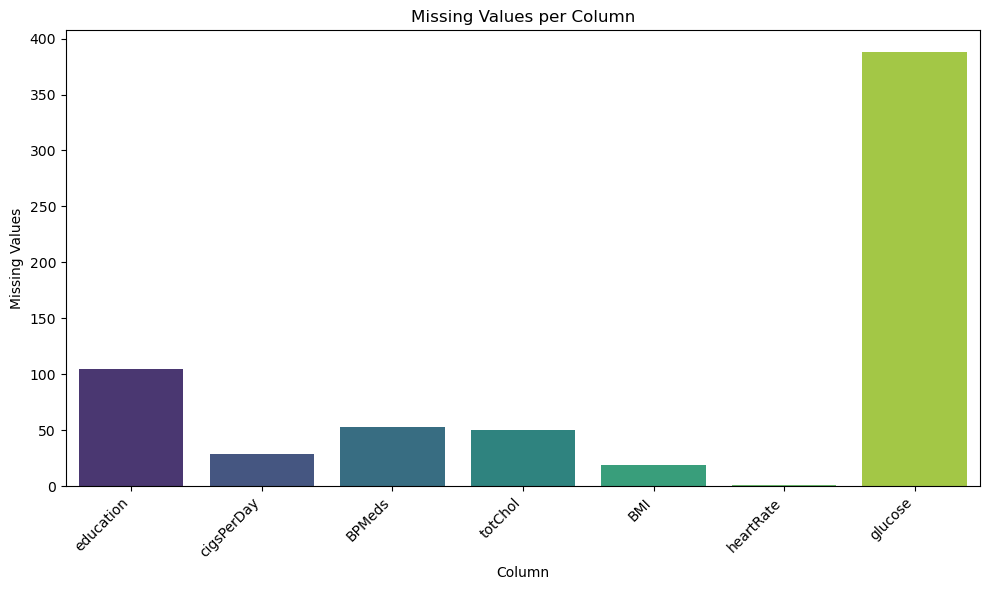

In [7]:
missing_df = df.isnull().sum().reset_index()
missing_df.columns = ['Column', 'Missing Values']
missing_df = missing_df[missing_df['Missing Values'] > 0]

plt.figure(figsize=(10, 6))
sns.barplot(x='Column', y='Missing Values', data=missing_df, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Missing Values per Column')
plt.tight_layout()
plt.show()

In [8]:
(df.isnull().sum()/len(df))*100

gender             0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

/Users/rahul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rahul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rahul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rahul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

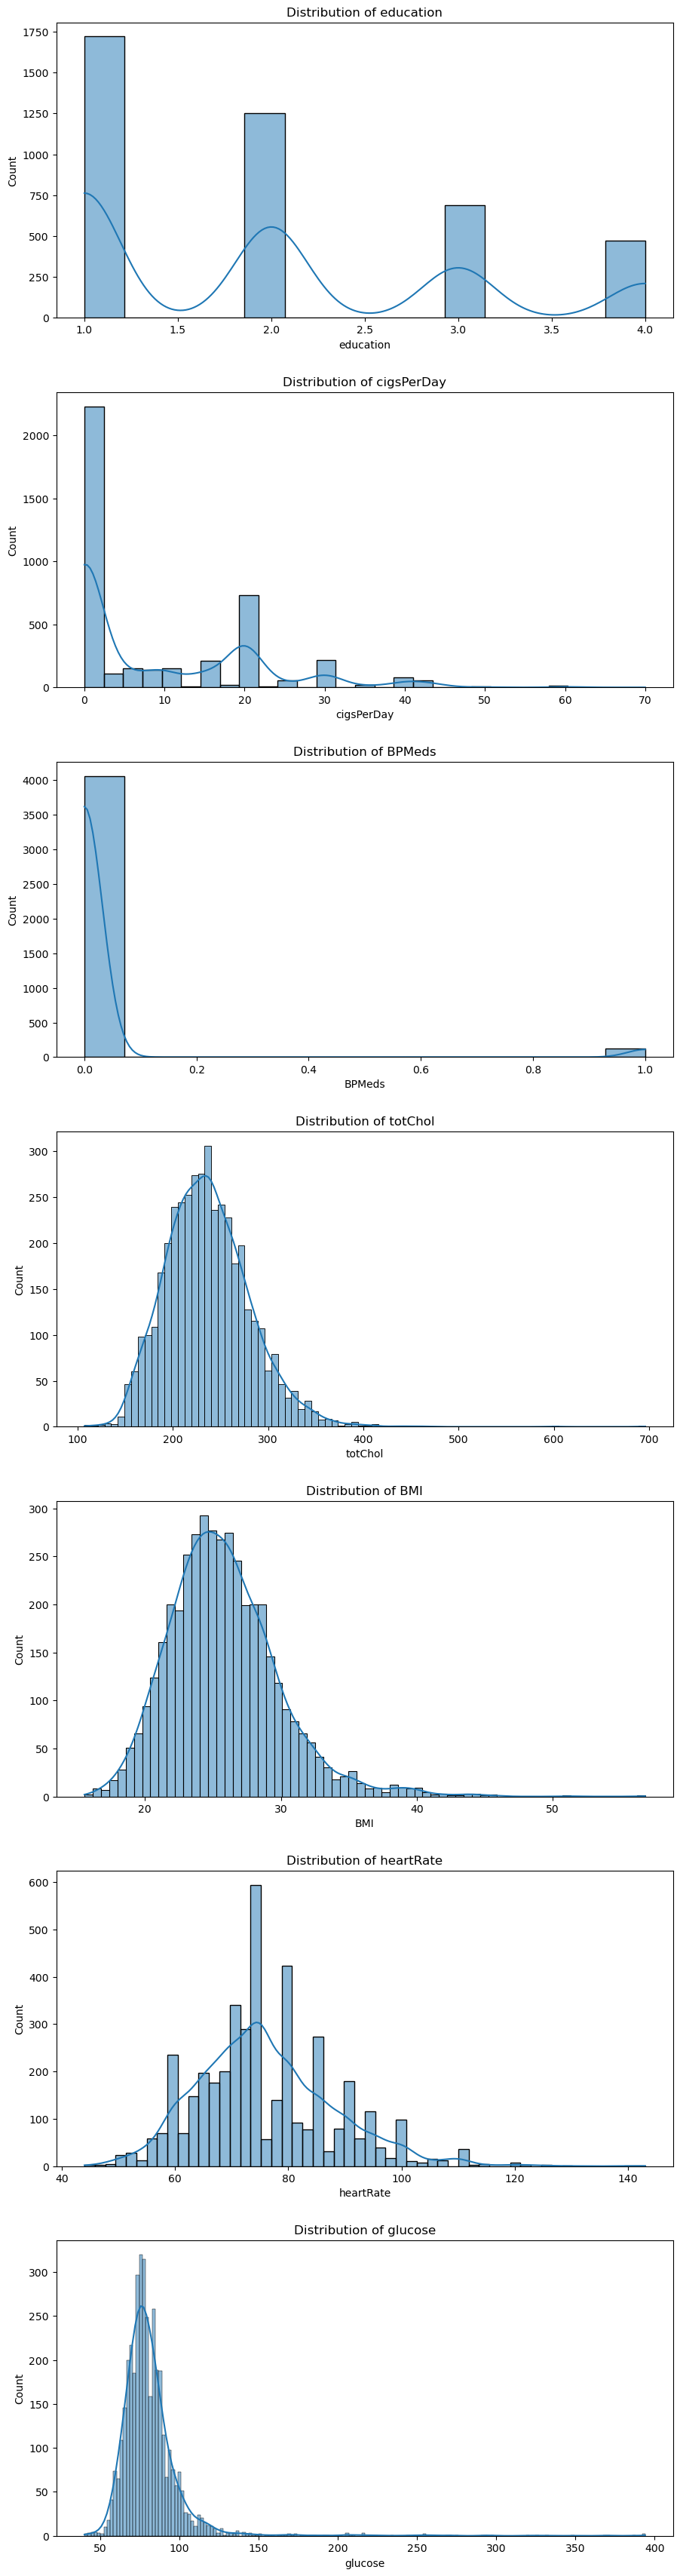

In [9]:
cols_with_missing_values = df.columns[df.isnull().sum() > 0]

# Create subplots for each column with missing values
fig, axes = plt.subplots(len(cols_with_missing_values), 1, figsize=(10, 5 * len(cols_with_missing_values)))
fig.tight_layout(pad=5.0)

# Plot the distribution for each column
for i, col in enumerate(cols_with_missing_values):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.show()

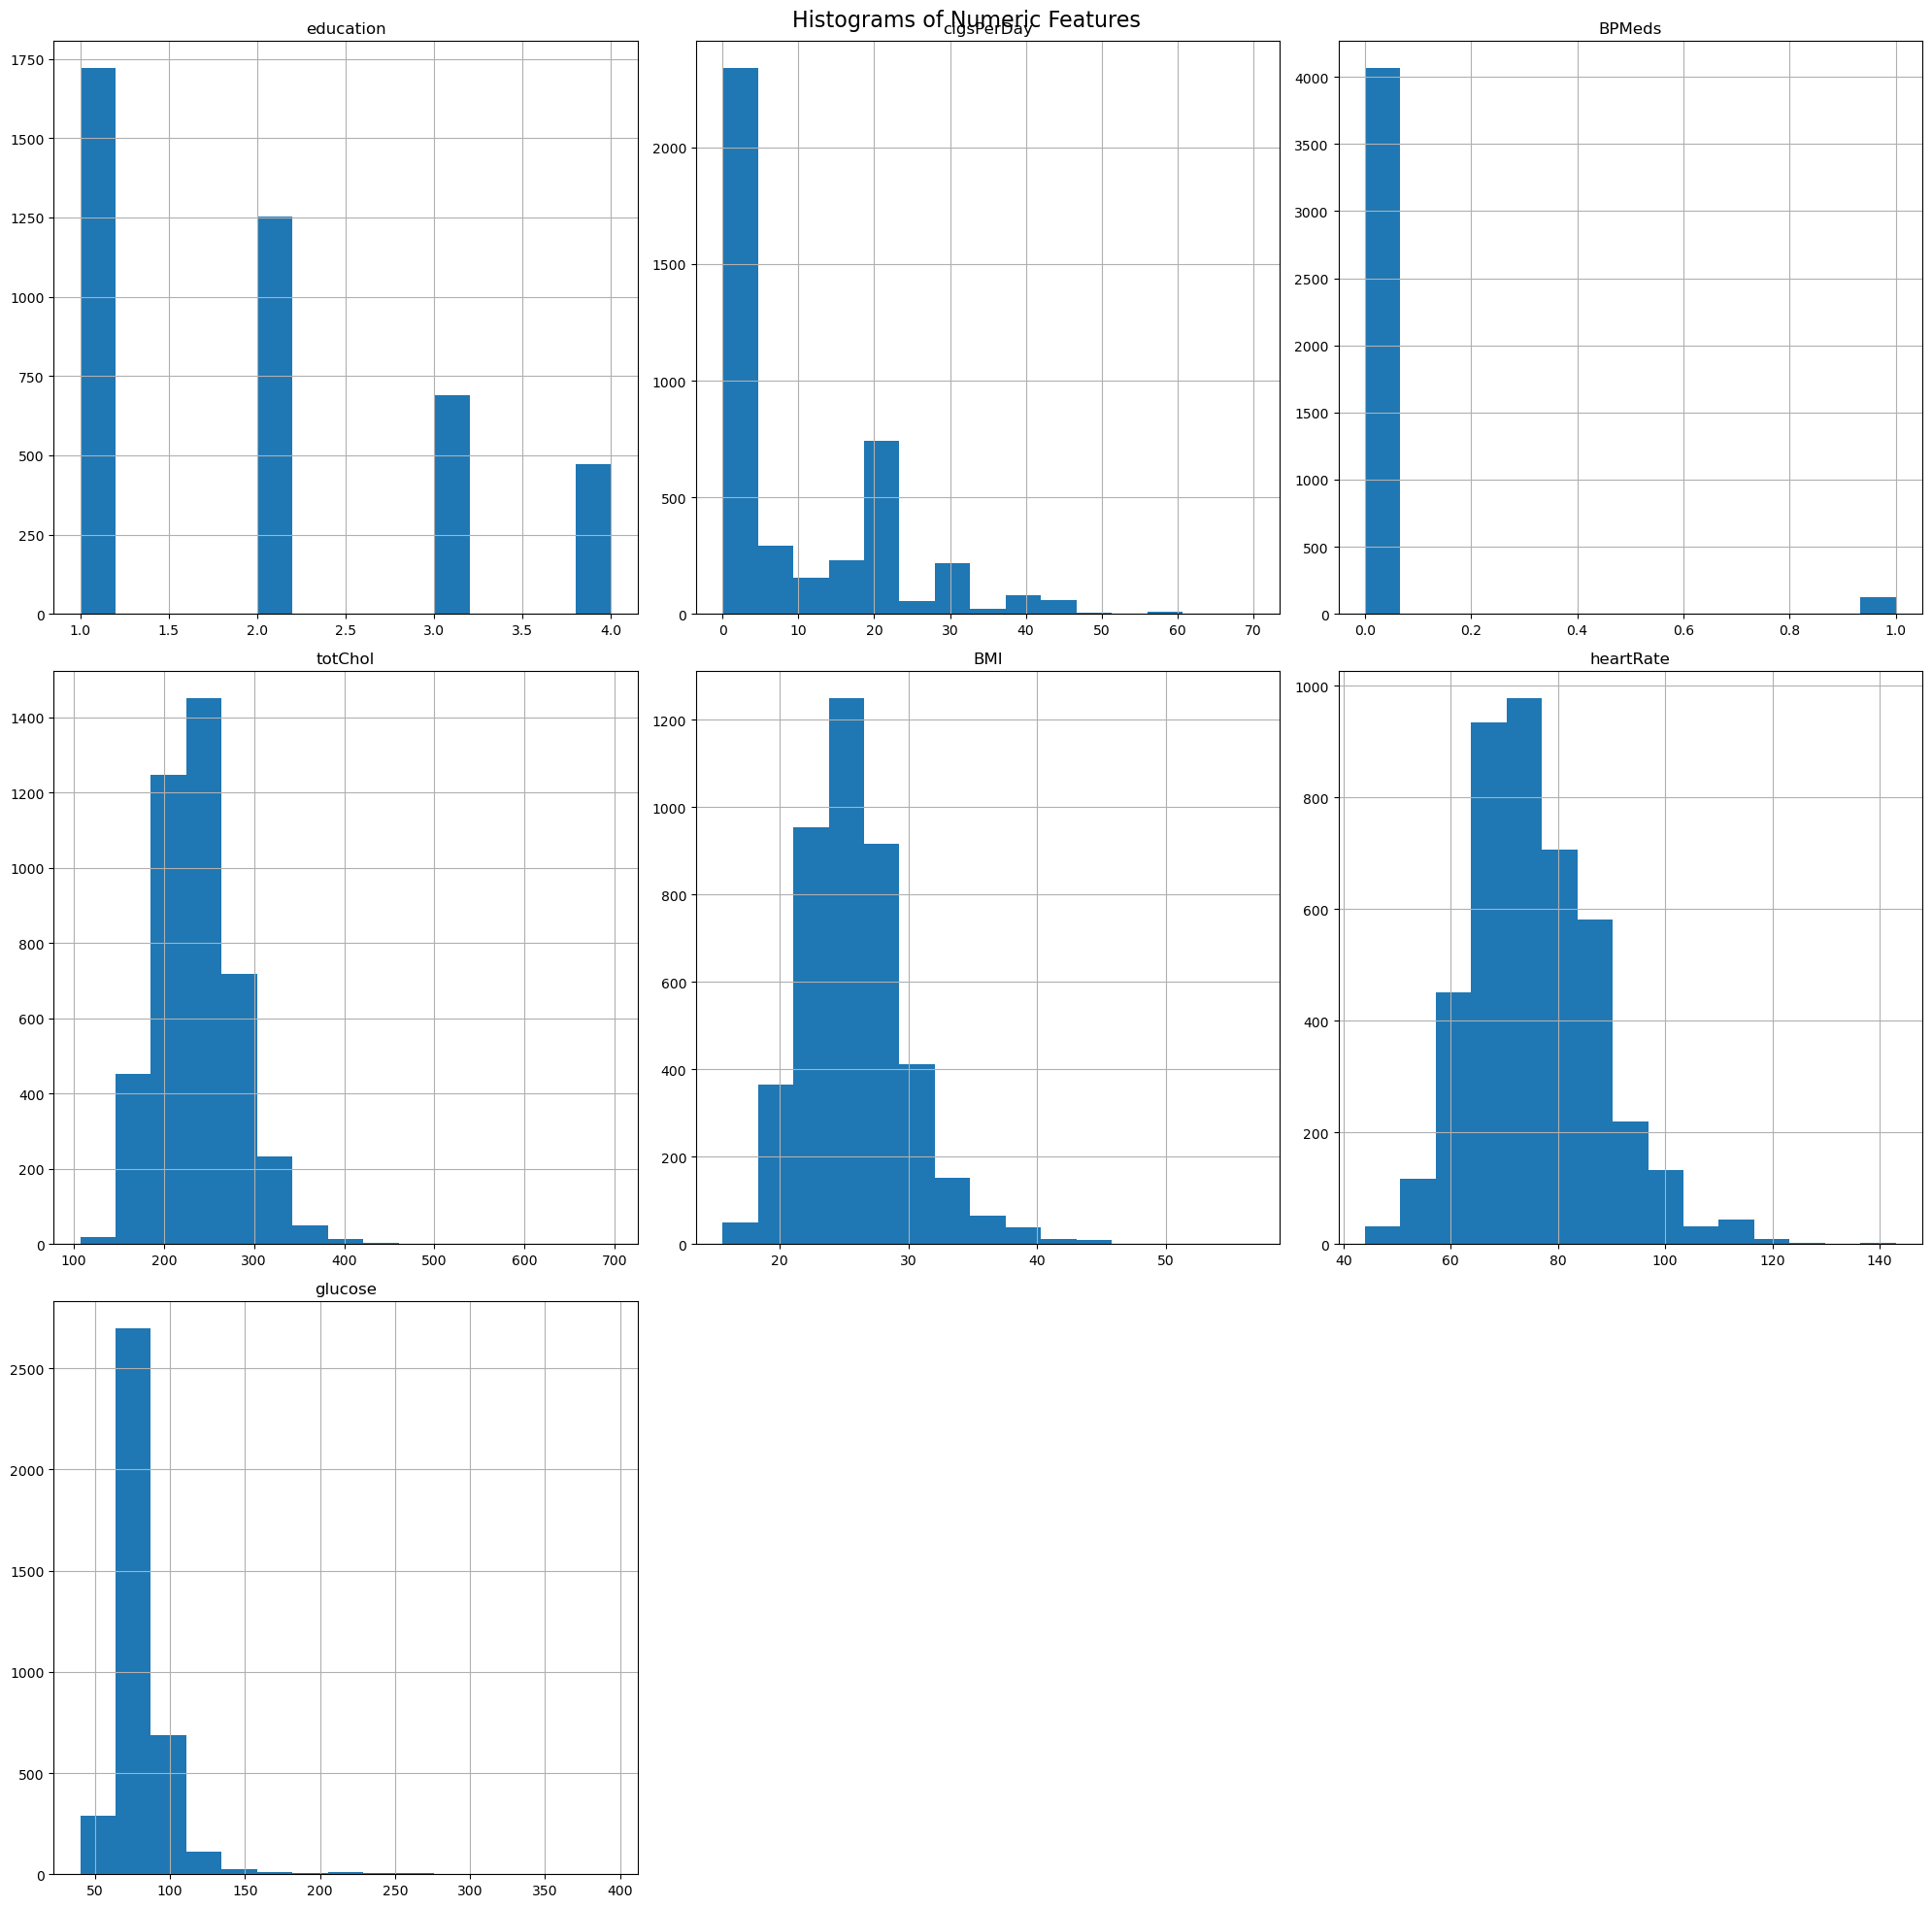

In [10]:
# Select only numeric columns with missing values
numeric_columns = df.select_dtypes(include=['number']).columns[df.isnull().sum()>0]

df[numeric_columns].hist(bins=15, figsize=(20, 20))
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()

## Dataframe Null values handled by median impuation.


As seen by the distribution graphs we see that these columns have outliers on both ends due to which we cannot use mean


In [11]:
df_imp= df.fillna(df.median())
df_imp.isnull().sum()

gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Imbalanced Data 

Handling the imabalanced data using, upsampling, SMOTE and testing results on both using XGB
- Findings: Upsampling gave a higher overall accuracy vs SMOTE, hence we use the upsampled dataset going forward.

## Data set with no corrections and testing using XGB

Accuracy: 0.8325471698113207
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       725
           1       0.28      0.10      0.14       123

    accuracy                           0.83       848
   macro avg       0.57      0.53      0.53       848
weighted avg       0.78      0.83      0.80       848



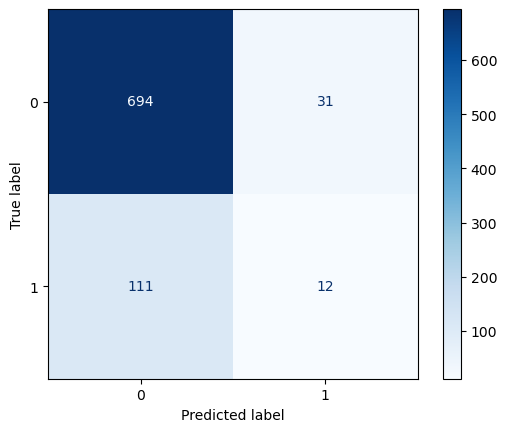

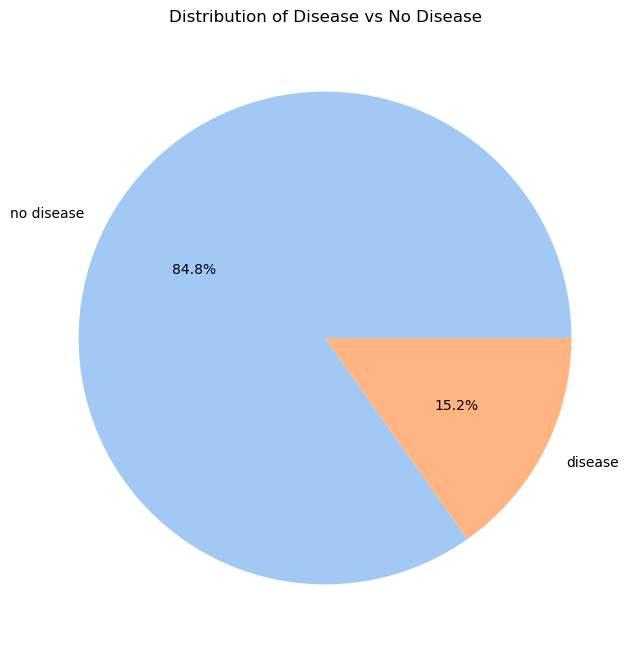

In [51]:
X = df_imp.drop('TenYearCHD', axis=1)
y = df_imp['TenYearCHD']

# Testing the upsampled data set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)
            
                          
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb_classifier.classes_)
disp.plot(cmap='Blues')
plt.show()
#TenYearCHD after upsampling the minority class
target = df_imp['TenYearCHD'].replace({1: 'disease', 0: 'no disease'},inplace=False)

target_distribution = target.value_counts()

plt.figure(figsize=(8, 8))
plt.pie(target_distribution, labels=target_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Disease vs No Disease')
plt.show()

## Upsampling the data and testing using XGB

Accuracy: 0.9159138290479499
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       735
           1       0.87      0.98      0.92       704

    accuracy                           0.92      1439
   macro avg       0.92      0.92      0.92      1439
weighted avg       0.92      0.92      0.92      1439



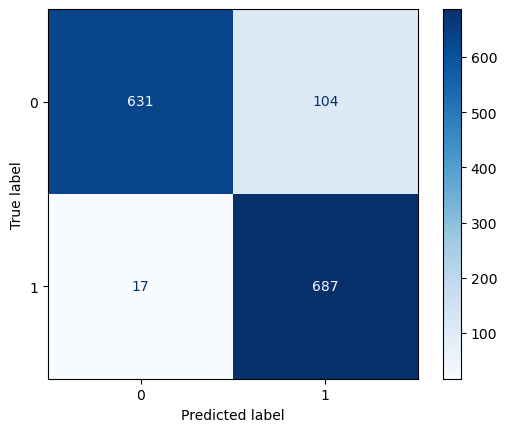

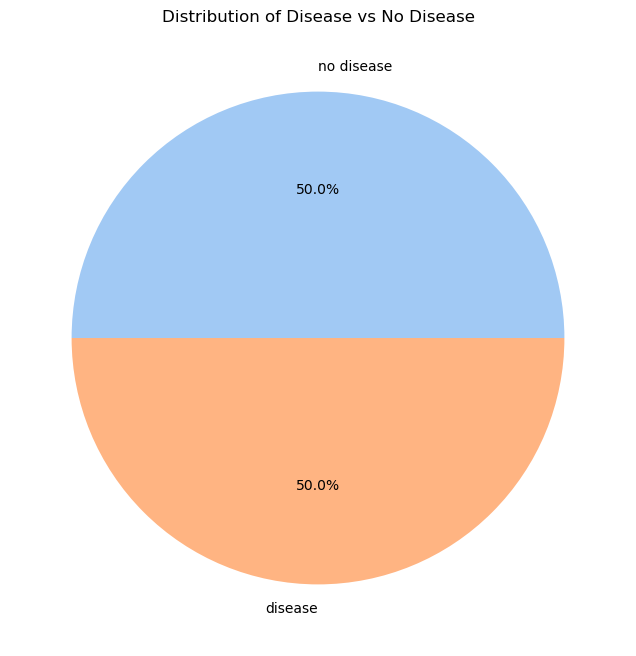

In [52]:
# Upsampling the minority class
data_majority = df_imp[df_imp['TenYearCHD'] == 0]
data_minority = df_imp[df_imp['TenYearCHD'] == 1]
data_minority_upsampled = resample(data_minority, replace=True, n_samples=len(data_majority), random_state=123)
df_up = pd.concat([data_majority, data_minority_upsampled])

# Splitting the dataset into features and target variable
X = df_up.drop('TenYearCHD', axis=1)
y = df_up['TenYearCHD']

# Testing the upsampled data set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)
            
                          
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb_classifier.classes_)
disp.plot(cmap='Blues')
plt.show()
#TenYearCHD after upsampling the minority class
target = df_up['TenYearCHD'].replace({1: 'disease', 0: 'no disease'},inplace=False)

target_distribution = target.value_counts()

plt.figure(figsize=(8, 8))
plt.pie(target_distribution, labels=target_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Disease vs No Disease')
plt.show()

## Upsampling using SMOTE and XGB to test

Accuracy: 0.8902015288394719
Accuracy: 0.8902015288394719
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       745
           1       0.91      0.86      0.88       694

    accuracy                           0.89      1439
   macro avg       0.89      0.89      0.89      1439
weighted avg       0.89      0.89      0.89      1439



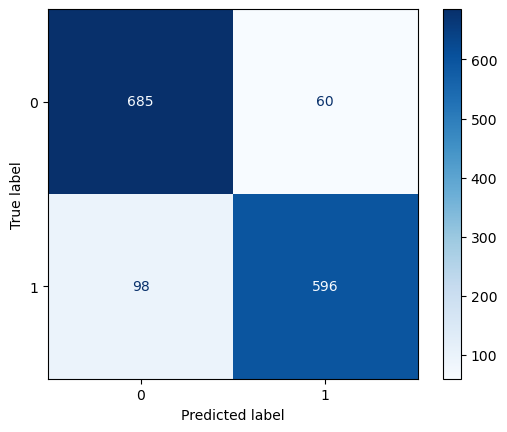

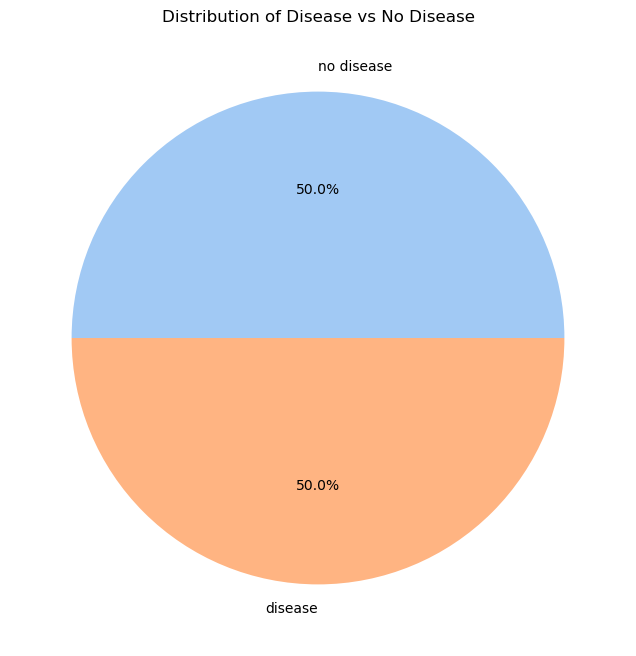

In [53]:
X = df_imp.drop('TenYearCHD', axis=1)
y = df_imp['TenYearCHD']

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
df_smo = pd.concat([X_smote,y_smote])

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test,y_pred)
            
                          
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb_classifier.classes_)
disp.plot(cmap='Blues')
plt.show()
#TenYearCHD after upsampling the minority class
target = df_up['TenYearCHD'].replace({1: 'disease', 0: 'no disease'},inplace=False)

target_distribution = target.value_counts()

plt.figure(figsize=(8, 8))
plt.pie(target_distribution, labels=target_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Disease vs No Disease')
plt.show()

# Feature Selection and Correaltion

- Feature selection is performed using various univariate methods, such as Chi-Squared, ANOVA F-value, and Mutual Information.
- Each column is evaluated using these methods, alongside model-based selectors like Logistic Regression and Random Forest.
- The top 10 features, selected most frequently across these methods, are used for model evaluation.

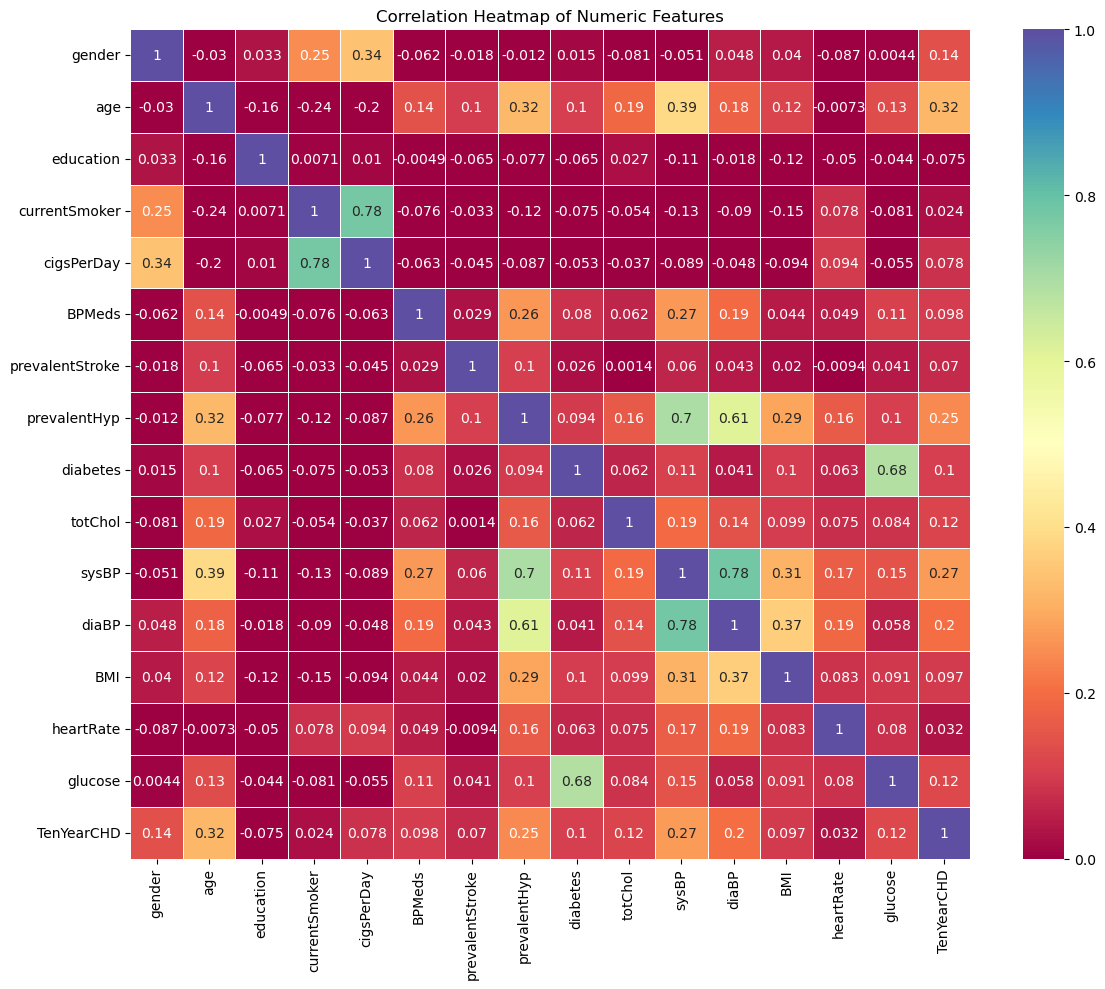

In [55]:
# Calculate correlation matrix
corr_matrix = df_up.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,vmin=0, vmax=1, linewidths=0.5, cmap='Spectral', annot=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

In [56]:
# Split df into X (features) and y (target)
x = df_up.drop(columns='TenYearCHD')  # Drop the target column to create the features DataFrame
y = df_up['TenYearCHD']  # Extract the target column

# Scale the data to improve convergence for logistic regression
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#Chi square selector
chi_selector = SelectKBest(score_func=chi2, k='all')  # Keep all since we only have 15 features
chi_selector.fit(x, y)
chi_support = chi_selector.get_support()

#Anova Selector
anova_selector = SelectKBest(score_func=f_classif, k='all')
anova_selector.fit(x, y)
anova_support = anova_selector.get_support()

mutual_info_selector = SelectKBest(score_func=mutual_info_classif, k='all')
mutual_info_selector.fit(x, y)
mutual_info_support = mutual_info_selector.get_support()

# Logistic Regression Selector with scaled data
embeded_lr_selector = SelectFromModel(LogisticRegression(max_iter=1000, solver='lbfgs'), max_features=15)
embeded_lr_selector.fit(x_scaled, y)
embeded_lr_support = embeded_lr_selector.get_support()

# Random Forest Selector
embeded_rf_selector = SelectFromModel(RandomForestClassifier(), max_features=15)
embeded_rf_selector.fit(x, y)
embeded_rf_support = embeded_rf_selector.get_support()

# XGBoost Selector
embeded_xgb_selector = SelectFromModel(XGBClassifier(), max_features=15)
embeded_xgb_selector.fit(x, y)
embeded_xgb_support = embeded_xgb_selector.get_support()

# LightGBM Selector with suppressed verbosity
embeded_lgb_selector = SelectFromModel(LGBMClassifier(verbose=-1), max_features=15)
embeded_lgb_selector.fit(x, y)
embeded_lgb_support = embeded_lgb_selector.get_support()

# Recursive Feature Elimination (RFE) with scaled data
rfe_selector = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=15)
rfe_selector.fit(x_scaled, y)
rfe_support = rfe_selector.get_support()

feature_name = x.columns
feature_selection_df = pd.DataFrame({
    'Feature': feature_name,
    'Chi-Squared': chi_support,
    'ANOVA': anova_support,
    'Mutual Info': mutual_info_support,
    'Logistic Regression': embeded_lr_support,
    'Random Forest': embeded_rf_support,
    'XGB': embeded_xgb_support,
    'LGB': embeded_lgb_support,
    'RFE': rfe_support
})

feature_selection_df['Total Selected'] = np.sum(feature_selection_df.iloc[:, 1:], axis=1)

feature_selection_df = feature_selection_df.sort_values(by='Total Selected', ascending=False)

feature_selection_df.head()

,Feature,Chi-Squared,ANOVA,Mutual Info,Logistic Regression,Random Forest,XGB,LGB,RFE,Total Selected
1,age,True,True,True,True,True,True,True,True,8
10,sysBP,True,True,True,True,True,False,True,True,7
14,glucose,True,True,True,True,True,False,True,True,7
0,gender,True,True,True,True,False,True,False,True,6
4,cigsPerDay,True,True,True,True,False,True,False,True,6


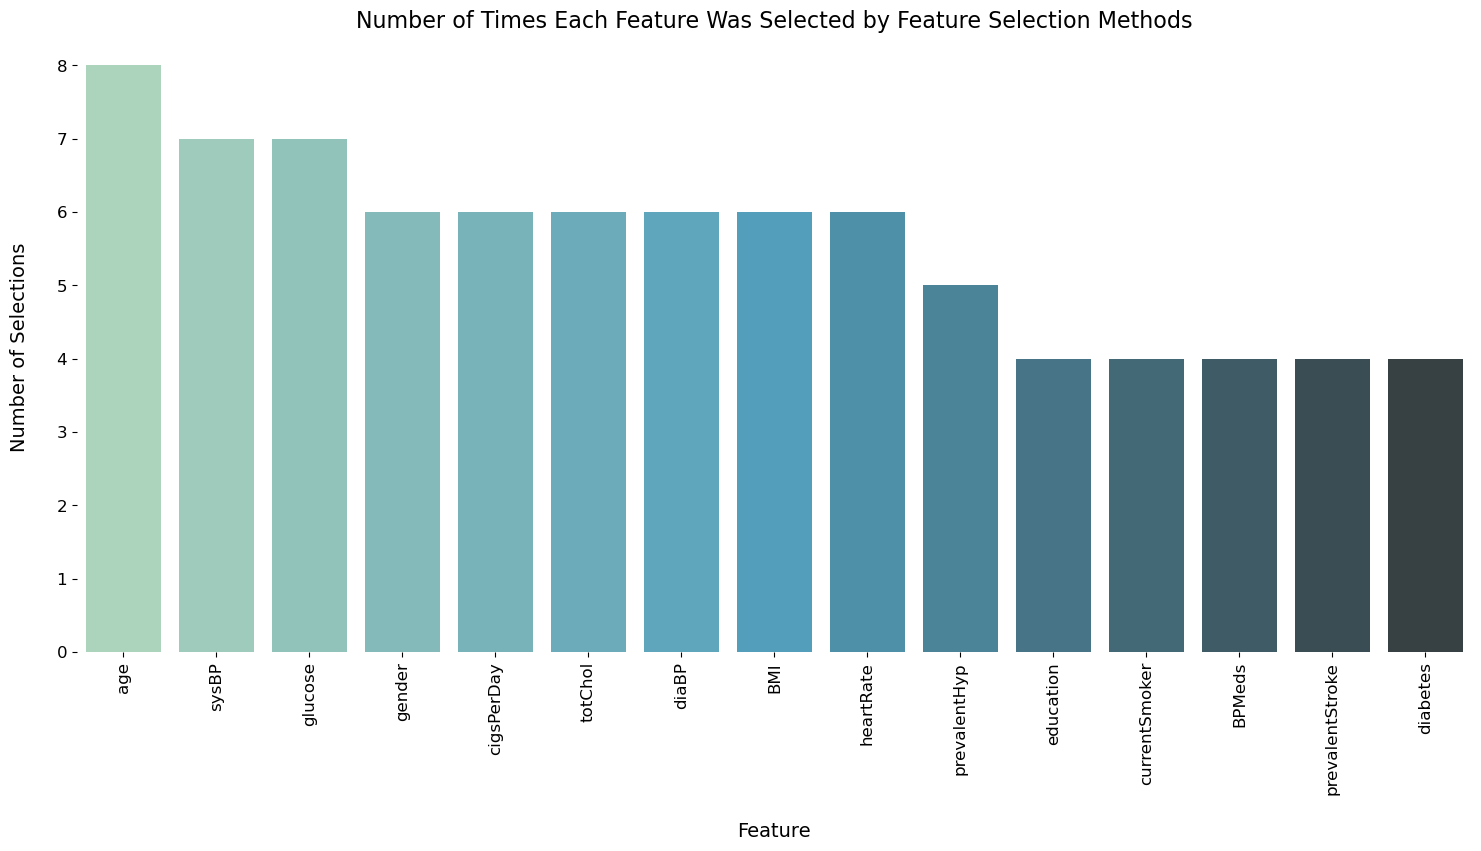

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_selection_df_sorted = feature_selection_df.sort_values(by='Total Selected', ascending=False)

plt.figure(figsize=(18, 8))
sns.barplot(x='Feature', y='Total Selected', data=feature_selection_df_sorted, palette='GnBu_d')
plt.title('Number of Times Each Feature Was Selected by Feature Selection Methods', fontsize=16)
plt.xlabel('\nFeature', fontsize=14)
plt.ylabel('Number of Selections \n', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.box(False)
plt.show()

In [62]:

top_10_features = feature_selection_df.sort_values(by='Total Selected', ascending=False).head(10)['Feature'].tolist()

ndf = x[top_10_features].copy()

print("Top 10 selected features:", top_10_features)
ndf.head()

Top 10 selected features: ['age', 'sysBP', 'glucose', 'gender', 'cigsPerDay', 'totChol', 'diaBP', 'BMI', 'heartRate', 'prevalentHyp']


,age,sysBP,glucose,gender,cigsPerDay,totChol,diaBP,BMI,heartRate,prevalentHyp
0,39,106.0,77.0,1,0.0,195.0,70.0,26.97,80.0,0
1,46,121.0,76.0,0,0.0,250.0,81.0,28.73,95.0,0
2,48,127.5,70.0,1,20.0,245.0,80.0,25.34,75.0,0
4,46,130.0,85.0,0,23.0,285.0,84.0,23.10,85.0,0
5,43,180.0,99.0,0,0.0,228.0,110.0,30.30,77.0,1


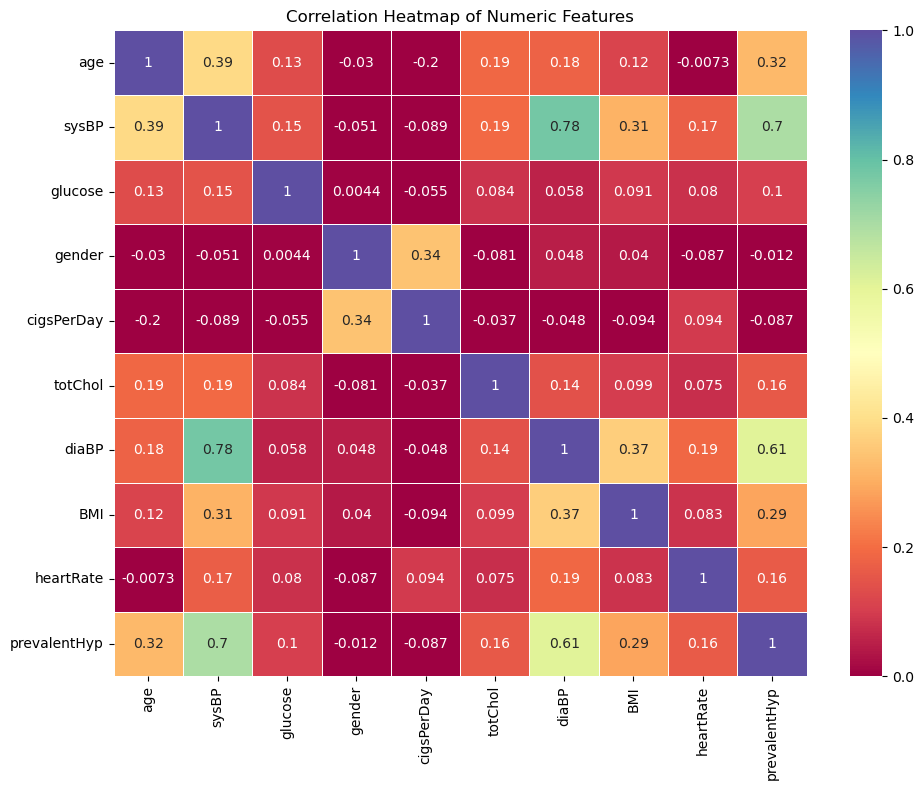

In [63]:
# Calculate correlation matrix
corr_matrix = ndf.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,vmin=0, vmax=1, linewidths=0.5,cmap='Spectral',annot=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

In [67]:
#Adding the target column back to the dataset
ndf['TenYearCHD'] = y
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7192 entries, 0 to 512
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           7192 non-null   int64  
 1   sysBP         7192 non-null   float64
 2   glucose       7192 non-null   float64
 3   gender        7192 non-null   int64  
 4   cigsPerDay    7192 non-null   float64
 5   totChol       7192 non-null   float64
 6   diaBP         7192 non-null   float64
 7   BMI           7192 non-null   float64
 8   heartRate     7192 non-null   float64
 9   prevalentHyp  7192 non-null   int64  
 10  TenYearCHD    7192 non-null   int64  
dtypes: float64(7), int64(4)
memory usage: 674.2 KB


In [74]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Assuming ndf is already defined
X = ndf.drop('TenYearCHD', axis=1)
y = ndf['TenYearCHD']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = MLPClassifier(hidden_layer_sizes=(50, 30, 10), random_state=42, activation='relu', max_iter=500)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Classification report as a dictionary
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

# Convert the report dictionary to a DataFrame
results_df = pd.DataFrame(report).transpose()

# Display the detailed results
results_df.head()

,precision,recall,f1-score,support
0,0.972767,0.811818,0.885035,1100.000000
1,0.833065,0.976371,0.899043,1058.000000
accuracy,0.892493,0.892493,0.892493,0.892493
macro avg,0.902916,0.894094,0.892039,2158.000000
weighted avg,0.904275,0.892493,0.891902,2158.000000


In [79]:
# Assuming ndf is already defined
X = ndf.drop('TenYearCHD', axis=1)
y = ndf['TenYearCHD']

# Step 2: Split the data into training and testing sets without undersampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naïve Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=3000, random_state=42),
    'k-NN': KNeighborsClassifier(n_neighbors=5),
    'Perceptron': Perceptron(max_iter=2000, random_state=42),
    'MLP Classifier': MLPClassifier(hidden_layer_sizes=(50, 30, 10), random_state=42, activation='relu', max_iter=500)
}

# Step 4: Train and evaluate the models
results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Append detailed scores to results for each model
    results.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, pos_label=1),
        'Recall': recall_score(y_test, y_pred, pos_label=1),
        'F1 Score': f1_score(y_test, y_pred, pos_label=1)
    })

# Create a DataFrame to display results
results_df = pd.DataFrame(results)

# Display the top 10 rows of the DataFrame sorted by 'Accuracy' in descending order
results_df.sort_values(by='F1 Score', ascending=False).head(10)

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.898517,0.834796,0.988658,0.905236
5,MLP Classifier,0.892493,0.833065,0.976371,0.899043
3,k-NN,0.785449,0.731158,0.889414,0.802559
2,Logistic Regression,0.664968,0.653811,0.672968,0.663251
1,Naïve Bayes,0.631603,0.670558,0.488658,0.565336
4,Perceptron,0.563485,0.572500,0.432892,0.493003


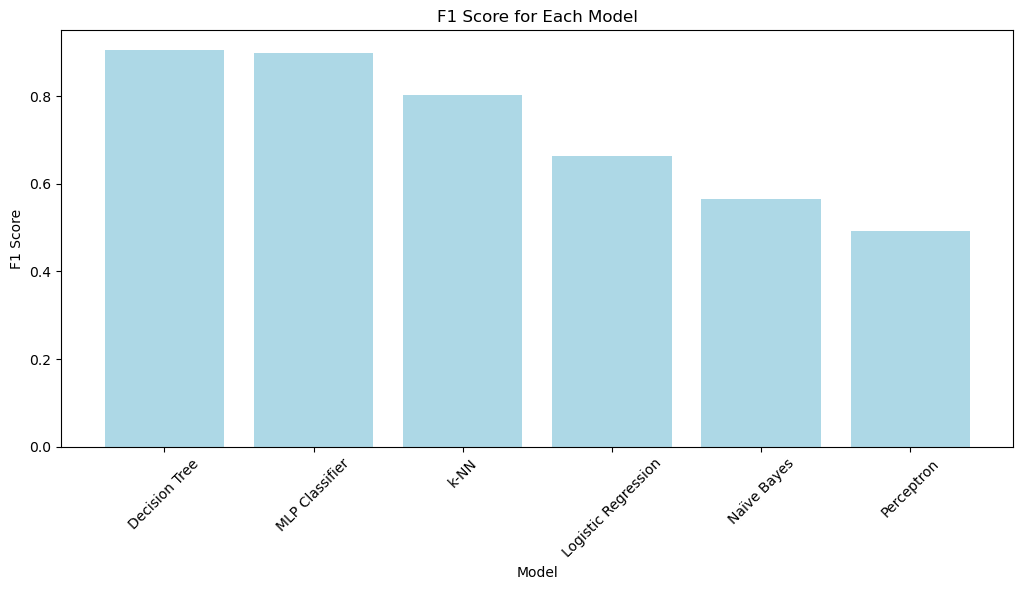

In [82]:
plt.figure(figsize=(20, 6))

# Sort the DataFrame and plot F1 Score
plt.subplot(1, 2, 1)
sorted_df = results_df.sort_values(by='F1 Score', ascending=False)
plt.bar(sorted_df['Model'], sorted_df['F1 Score'], color='lightblue')
plt.title('F1 Score for Each Model')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()

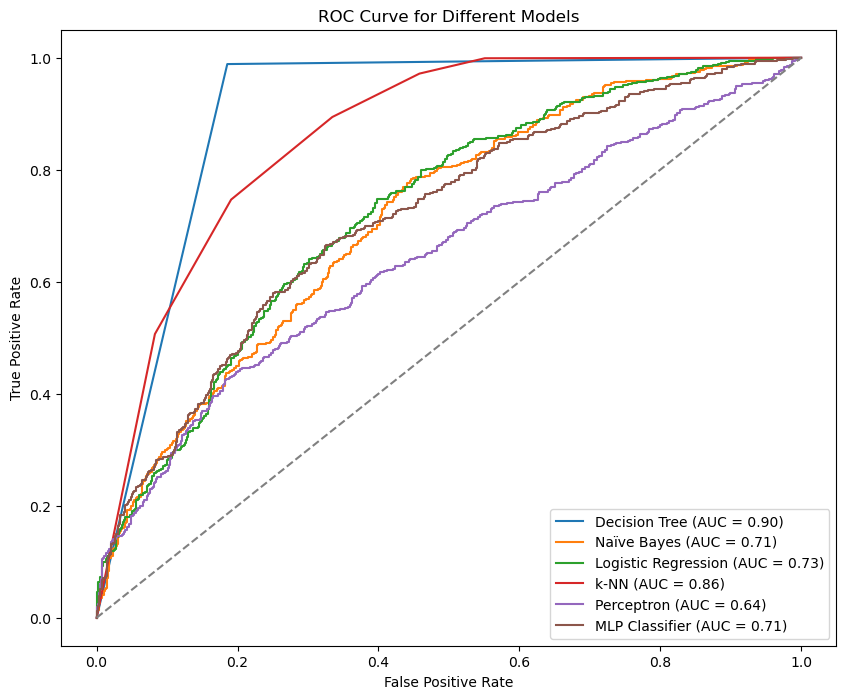

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Generate ROC curves for each model and calculate AUC
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    # Get the predicted probabilities for the positive class (e.g., Disease)
    try:
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]  # Use predict_proba if available
        else:
            y_prob = model.decision_function(X_test)  # Use decision_function if available

        # Calculate the ROC curve and AUC
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)

        # Plot the ROC curve
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    except Exception as e:
        print(f"Could not generate ROC curve for {model_name}: {e}")

# Plot the diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models')
plt.legend(loc='lower right')
plt.show()

## Clustering

/Users/rahul/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rahul/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rahul/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rahul/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rahul/anacond

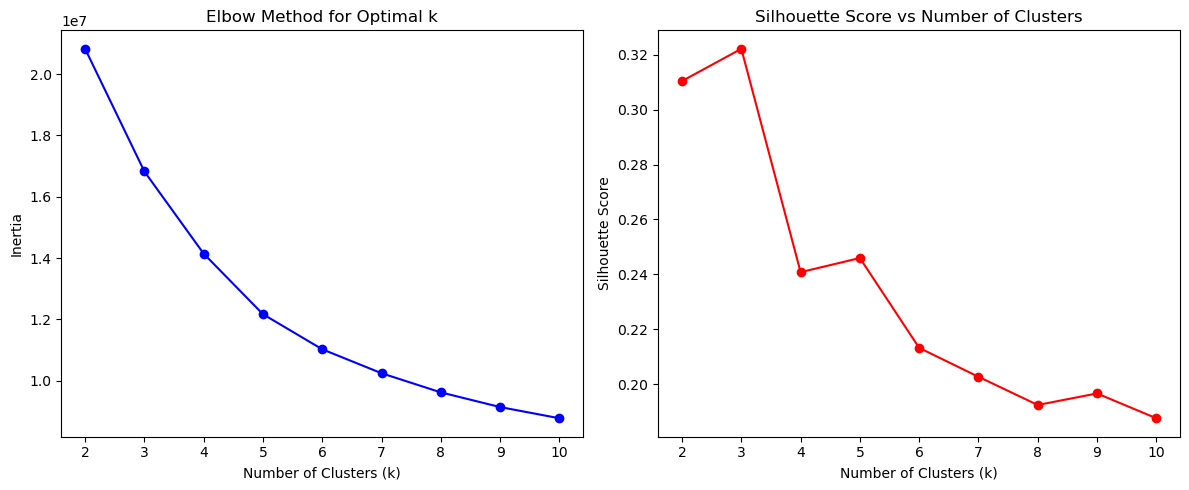

In [83]:
k_range = range(2, 11)
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')

plt.tight_layout()
plt.show()

/Users/rahul/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


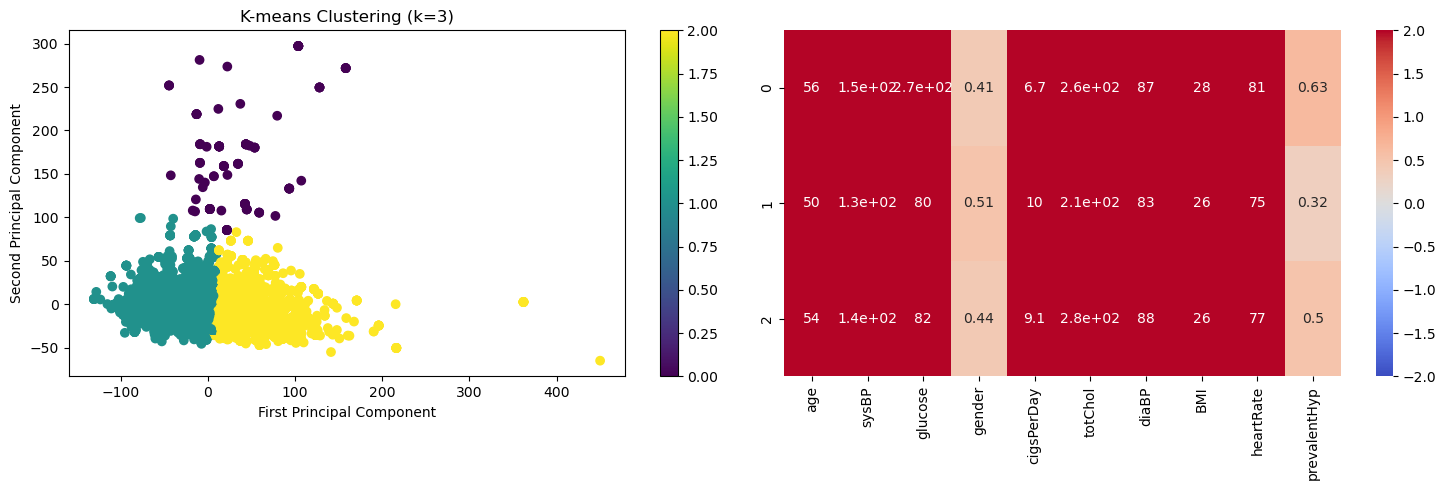

In [87]:
optimal_k = k_range[np.argmax(silhouette_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot clusters
plt.figure(figsize=(15, 5))

# Cluster visualization
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (k={optimal_k})')
plt.colorbar(scatter)

# Heatmap
plt.subplot(1, 2, 2)
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
# Data scaling
scaled_centers = (cluster_centers - cluster_centers.median()) / cluster_centers.std()
sns.heatmap(cluster_centers, cmap='coolwarm', center=0, vmin=-2, vmax=2, annot=True)

plt.tight_layout()
plt.show()